<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-dataset-report" data-toc-modified-id="Basic-dataset-report-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic dataset report</a></span><ul class="toc-item"><li><span><a href="#All-sales" data-toc-modified-id="All-sales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>All sales</a></span></li><li><span><a href="#Sales-and-stock-by-one-product" data-toc-modified-id="Sales-and-stock-by-one-product-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sales and stock by one product</a></span></li><li><span><a href="#Out-of-stock-estimation" data-toc-modified-id="Out-of-stock-estimation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Out-of-stock estimation</a></span></li><li><span><a href="#Sale-trends-by-product-category" data-toc-modified-id="Sale-trends-by-product-category-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Sale trends by product category</a></span></li><li><span><a href="#Sale-rends-by-store-type" data-toc-modified-id="Sale-rends-by-store-type-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Sale rends by store type</a></span></li><li><span><a href="#Distribution-of-sold-items-by-product-category-and-store-type---on-product-level" data-toc-modified-id="Distribution-of-sold-items-by-product-category-and-store-type---on-product-level-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Distribution of sold items by product category and store type - on product level</a></span></li><li><span><a href="#Distribution-of-sold-items-by-product-category-and-store-type---in-total" data-toc-modified-id="Distribution-of-sold-items-by-product-category-and-store-type---in-total-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Distribution of sold items by product category and store type - in total</a></span></li><li><span><a href="#Percentage-of-products-with-zero-sales" data-toc-modified-id="Percentage-of-products-with-zero-sales-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Percentage of products with zero sales</a></span></li><li><span><a href="#Percentage-of-stock-sold---total-sales-divided-by-total-stock" data-toc-modified-id="Percentage-of-stock-sold---total-sales-divided-by-total-stock-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Percentage of stock sold - total sales divided by total stock</a></span></li><li><span><a href="#Distribution-of-active-days-by-product-(how-many-days-products-are-on-sale-on-average)" data-toc-modified-id="Distribution-of-active-days-by-product-(how-many-days-products-are-on-sale-on-average)-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Distribution of active days by product (how many days products are on sale on average)</a></span></li><li><span><a href="#Total-items-sold-by-promo-type" data-toc-modified-id="Total-items-sold-by-promo-type-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Total items sold by promo type</a></span></li><li><span><a href="#Total-items-sold-by-product-category" data-toc-modified-id="Total-items-sold-by-product-category-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Total items sold by product category</a></span></li><li><span><a href="#Total-items-sold-by-store-type" data-toc-modified-id="Total-items-sold-by-store-type-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Total items sold by store type</a></span></li><li><span><a href="#Total-items-sold-by-city" data-toc-modified-id="Total-items-sold-by-city-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Total items sold by city</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [1]:
from helpers.utils import read_csv, MAPE
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pickle
import numpy as np
import gc
from itertools import cycle
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import warnings
import random

warnings.filterwarnings('ignore')

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = [c for c in sns.color_palette('husl', n_colors=50)]
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

random.Random(1).shuffle(color_pal)

In [83]:
sales = read_csv(r'data/sales.csv')
taxonomy = read_csv(r'data/product_taxonomy.csv')
stores = read_csv(r'data/store_cities.csv')

Mem. usage decreased from 8412.51 Mb to 8004.33 Mb (4.9% reduction)
Mem. usage decreased from  0.31 Mb to  0.31 Mb (2.6% reduction)
Mem. usage decreased from  0.03 Mb to  0.03 Mb (3.6% reduction)


In [84]:
data = pd.merge(sales, taxonomy, how='inner', on = ['product_id'])\
         .merge(stores, how='inner', on = ['store_id'])

In [85]:
del sales, taxonomy, stores
gc.collect()

20902

# Basic dataset report

In [1]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(data, minimal=True)
# profile

In [6]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data[(data.date <= datetime.datetime(2019, 10, 31))]


data['weekday'] = data.date.dt.dayofweek
data['week'] = data.date.dt.isocalendar().week
data['month'] = data.date.dt.month
data['quarter'] = data.date.dt.quarter
data['year'] = data.date.dt.year
data['year_month'] = data.date.dt.strftime('%Y-%m')
data['year_quarter'] = pd.PeriodIndex(data.date, freq='Q')

## All sales

In [7]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

c1 = next(color_cycle)
c2 = next(color_cycle)

data.groupby('date')['sales'].sum() \
    .T \
    .plot(figsize=(15, 5),
          label='Sales (Items Sold)',
          color=c1, ax=ax1)

data.groupby('date')['revenue'].sum() \
    .T \
    .plot(figsize=(15, 5),
          label='Total Revenue',
          color=c2, ax=ax2)

ax1.set_ylabel('Sales (Items Sold)', color=c1)
ax2.set_ylabel('Revenue', color=c2)

ax1.legend(loc=0)
ax2.legend(loc=0)

plt.title('Total Sales')
plt.show()

## Sales and stock by one product

Let's look at one product in some particular shop to understand how sales and stock are related to each other

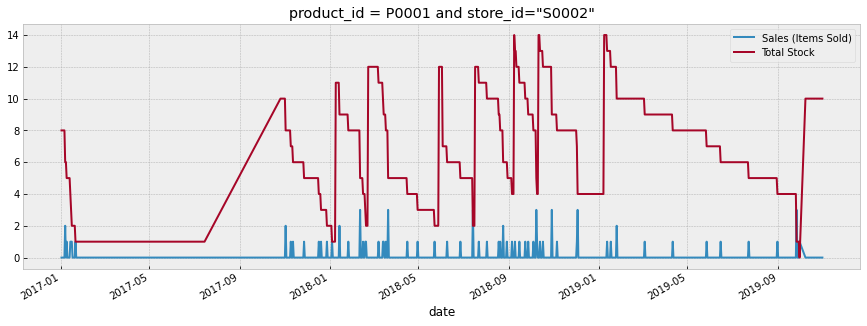

In [7]:
sample = data[(data.product_id == 'P0001') & (data.store_id == 'S0002')]

fig, ax1 = plt.subplots()


c1 = next(color_cycle)
c2 = next(color_cycle)

sample.groupby('date')['sales'].sum() \
    .T \
    .plot(figsize=(15, 5),
          label='Sales (Items Sold)',
          color=c1, ax=ax1)

sample.groupby('date')['stock'].sum() \
    .T \
    .plot(figsize=(15, 5),
          label='Total Stock',
          color=c2, ax=ax1)


ax1.legend(loc=0)

plt.title('product_id = P0001 and store_id="S0002"')
plt.show()

It looks like out-of-stock situations are possible

In [8]:
def apply_formatting(col):
    if col.name == 'date':
        return ["background-color: red" if x == datetime.datetime(2019, 9, 30) else "background-color: green" 
                if x == datetime.datetime(2019, 10, 8) else "background-color: white" for x in col.values]
    if col.name == 'stock':
        return ['background-color: green' if x > 0  else "background-color: red" for x in col.values]

In [16]:
s = sample[(sample.date >= datetime.datetime(2019, 9, 25))][['date', 'sales', 'stock', 'promo_type_1']].head(15)\
.style.apply(apply_formatting)

In [22]:
s

There could have been sales of this product in period from 2019-10-01 to 2019-10-07 but it had no stock available

## Out-of-stock estimation

Let's estimate out-of-stock rate.

Out of stock (OOS) rate is the inverse of an in-stock rate and refers to the amount of an assortment that is not in stock. It is calculated as SKUs not in stock divided by total available SKUs. The importance of calculating an OOS rate is to measure the customer shopping experience and well as to quantify lost sales. 

We will calculate this rate based on store_id level. E.g. if product A is sold in 4 stores and out of stock in 1 of 4 stores then OOS rate is (1/4) = 25%. The overall OSS rate is then averaged across all stores and products.

In [49]:
all_dates = data[['date']].drop_duplicates()
all_product = data.groupby(['product_id', 'store_id'])['date'].agg(['min', 'max']).reset_index()
all_product.columns = ['product_id', 'store_id', 'min_date', 'max_date']

cross_join = pd.merge(all_dates.assign(key=1), all_product.assign(key=1), how='inner', on='key').drop('key', axis=1)
cross_join = cross_join[cross_join.date.between(cross_join.min_date, cross_join.max_date)]


del all_dates, all_product
gc.collect()

0

In [50]:
cross_join.shape

(20596013, 5)

In [51]:
cross_join = pd.merge(cross_join, data[['date', 'product_id', 'sales',
                                        'stock', 'store_id', 'hierarchy1_id', 'storetype_id']], on=['product_id', 'date', 'store_id'], how='left')

In [52]:
cross_join = cross_join.sort_values(by=['product_id', 'store_id', 'date'])

In [53]:
cross_join.shape

(20596013, 9)

In [54]:
cross_join['next_sale_date'] = cross_join[cross_join.sales > 0].groupby(['product_id', 'store_id'])['date'].shift(-1)

In [55]:
cross_join['delta_btw_sales'] = (cross_join.next_sale_date - cross_join.date).dt.days

In [69]:
cross_join['delta_btw_sales'] = cross_join.groupby(['product_id', 'store_id'])['delta_btw_sales'].ffill()
cross_join['hierarchy1_id'] = cross_join.groupby(['product_id', 'store_id'])['hierarchy1_id'].ffill()
cross_join['storetype_id'] = cross_join.groupby(['product_id', 'store_id'])['storetype_id'].ffill()

In [57]:
cross_join['oos'] = (((cross_join['stock'] == 0) | (cross_join['stock'].isnull())) & 
                    (cross_join['delta_btw_sales'] <= 30) & 
                    ((cross_join['sales'] == 0) | (cross_join['sales'].isnull())))*1

In [70]:
cross_join.head(15)

date product_id store_id   min_date   max_date  sales  stock  \
530870 2017-02-09      P0001    S0001 2017-02-09 2019-10-31    1.0    0.0   
545180 2017-02-10      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
559501 2017-02-11      P0001    S0001 2017-02-09 2019-10-31    1.0    0.0   
573839 2017-02-12      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
588185 2017-02-13      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
602531 2017-02-14      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
616889 2017-02-15      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
631258 2017-02-16      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
645639 2017-02-17      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
660028 2017-02-18      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
674436 2017-02-19      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
688868 2017-02-20      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
703312 2017-02-21      P0001    S0001 2017-02-09 2019-10-31    1.0    0.0   
717793 2017-02-22      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   
732303 2017-02-23      P0001    S0001 2017-02-09 2019-10-31    NaN    NaN   

       hierarchy1_id storetype_id next_sale_date  delta_btw_sales  oos  
530870           H01         ST04     2017-02-11              2.0    0  
545180           H01         ST04            NaT              2.0    1  
559501           H01         ST04     2017-02-21             10.0    0  
573839           H01         ST04            NaT             10.0    1  
588185           H01         ST04            NaT             10.0    1  
602531           H01         ST04            NaT             10.0    1  
616889           H01         ST04            NaT             10.0    1  
631258           H01         ST04            NaT             10.0    1  
645639           H01         ST04            NaT             10.0    1  
660028           H01         ST04            NaT             10.0    1  
674436           H01         ST04            NaT             10.0    1  
688868           H01         ST04            NaT             10.0    1  
703312           H01         ST04     2018-01-31            344.0    0  
717793           H01         ST04            NaT            344.0    0  
732303           H01         ST04            NaT            344.0    0

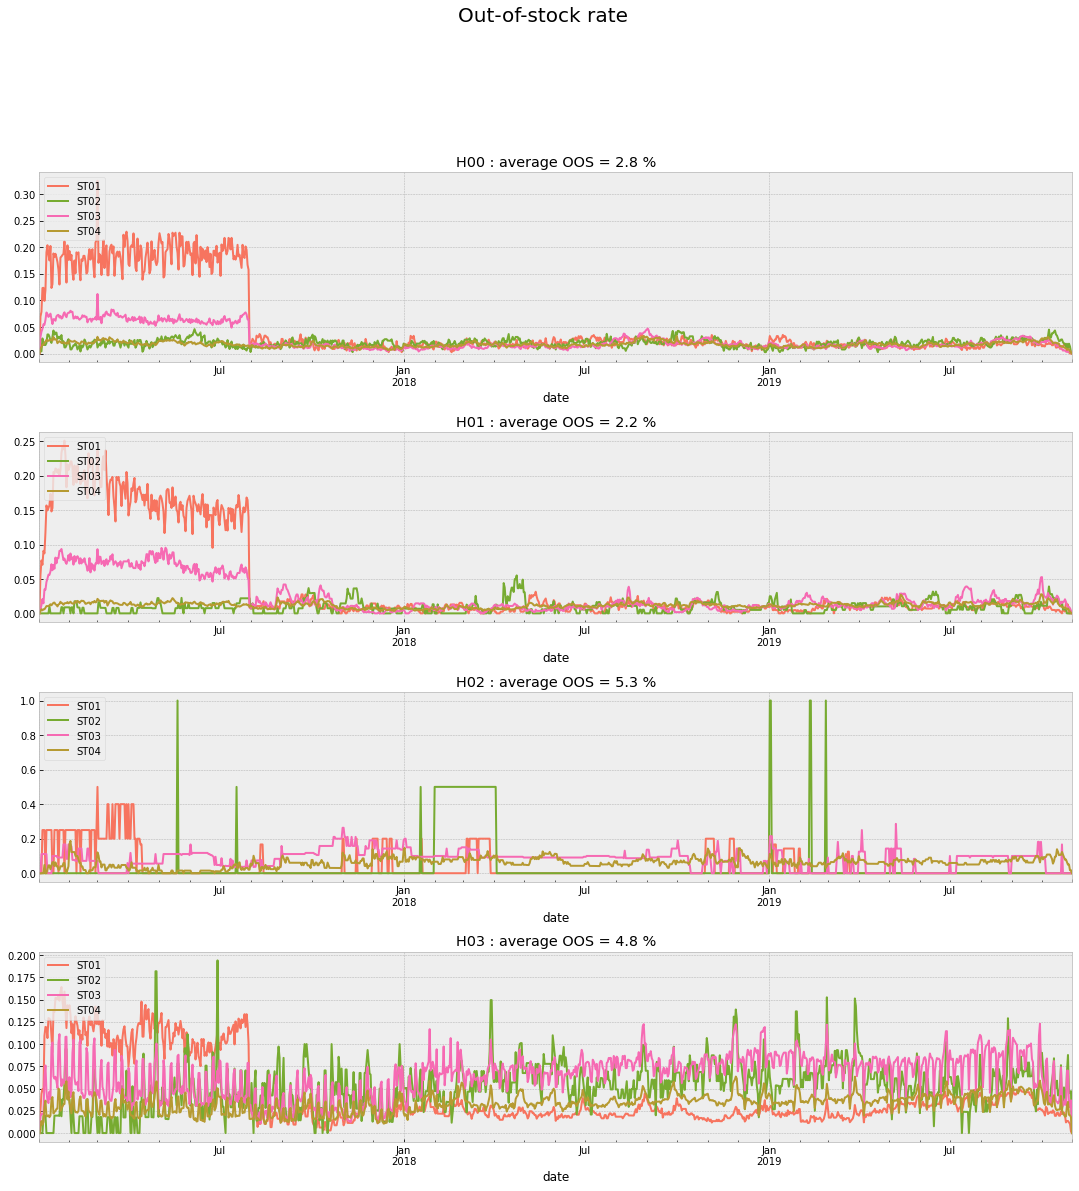

In [81]:
def calculate_oos(data, hierarchy1_id, storetype_id):
    return data[(data.hierarchy1_id == hierarchy1_id) & 
                (data.storetype_id == storetype_id)]\
                .groupby('date')['oos'].mean()

t = cross_join.groupby(['date', 'storetype_id', 'hierarchy1_id'])['oos'].mean().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 15))

oos = t[t.hierarchy1_id == 'H00']['oos'].mean()
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_oos(t, 'H00', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax1, kind='line', color=color_pal[index], 
                           title='H00 : average OOS rate = {0:0.1f} %'.format(oos*100))

oos = t[t.hierarchy1_id == 'H01']['oos'].mean()
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_oos(t, 'H01', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax2, kind='line', color=color_pal[index], 
                           title='H01 : average OOS rate = {0:0.1f} %'.format(oos*100))

oos = t[t.hierarchy1_id == 'H02']['oos'].mean()
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_oos(t, 'H02', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax3, kind='line', color=color_pal[index], 
                           title='H02 : average OOS rate = {0:0.1f} %'.format(oos*100))

oos = t[t.hierarchy1_id == 'H03']['oos'].mean()
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_oos(t, 'H03', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax4, kind='line', color=color_pal[index], 
                           title='H03 : average OOS rate = {0:0.1f} %'.format(oos*100))
    
fig.suptitle('Out-of-stock rate',
             size=20,
             y=1.1)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
oos=cross_join.oos.mean()*100
print(f'Average OOS rate: {oos:0.1f}%')

Average OOS rate: 2.3%


## Sale trends by product category

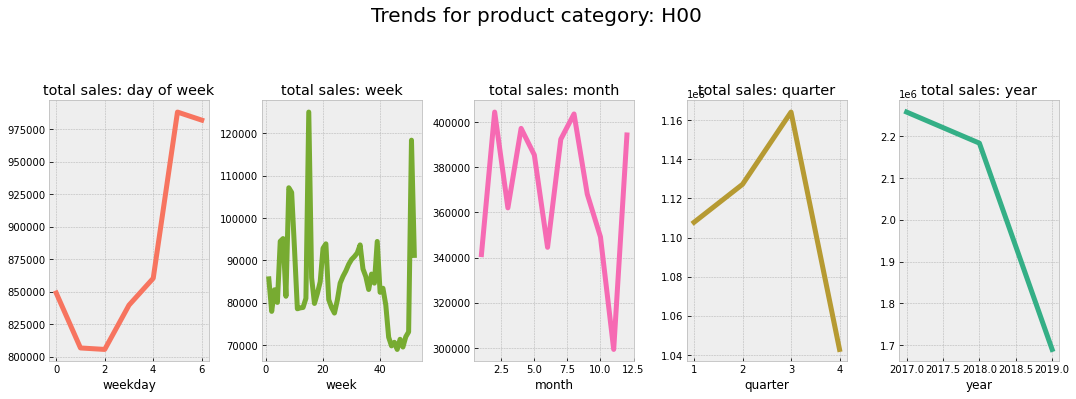

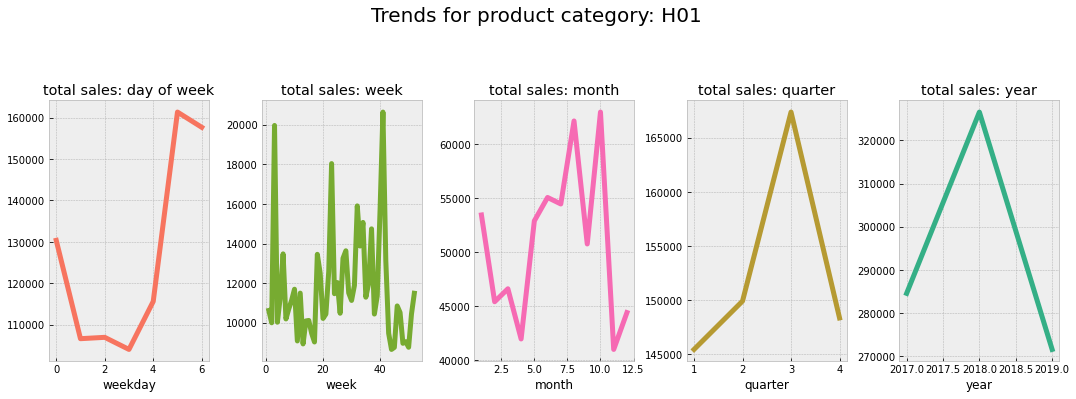

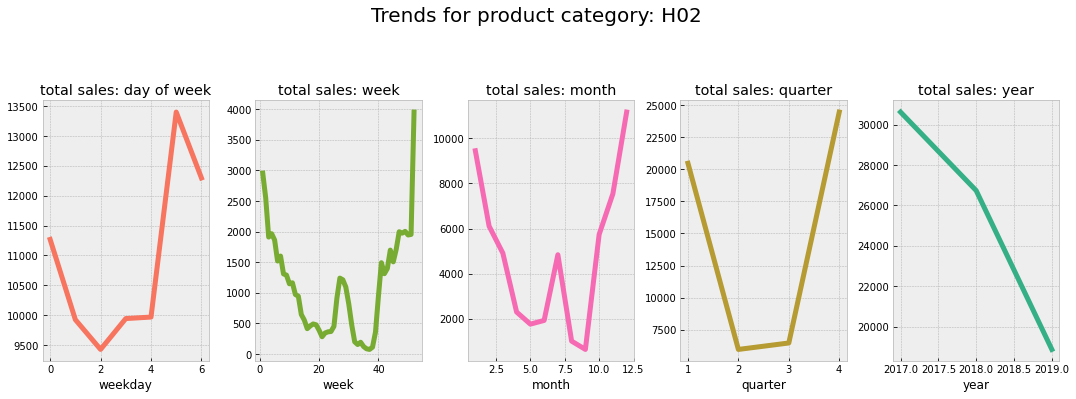

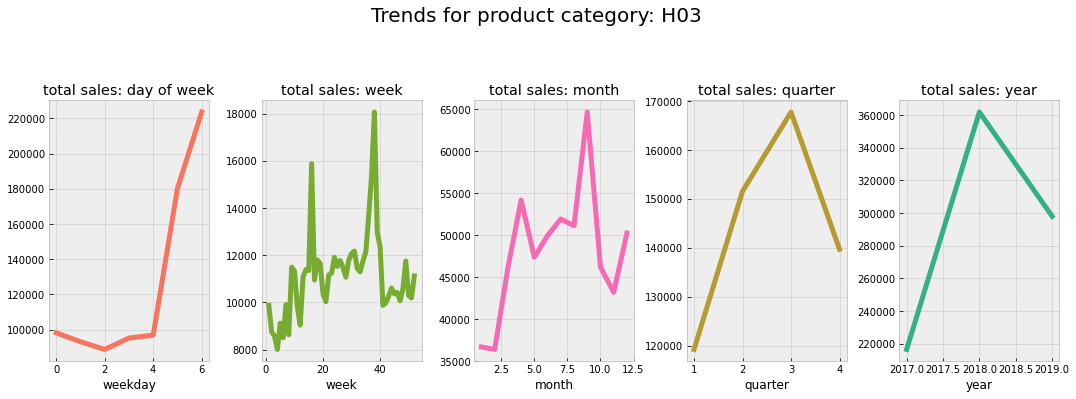

In [64]:
for hierarchy1_id in sorted(data.hierarchy1_id.unique()):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
    data[data.hierarchy1_id == hierarchy1_id].groupby('weekday')['sales'].sum() \
        .plot(kind='line',
              title='total sales: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    data[(data.hierarchy1_id == hierarchy1_id) & (data.year < 2019)].groupby('week')['sales'].sum() \
        .plot(kind='line',
              title='total sales: week',
              lw=5,
              color=color_pal[1],

              ax=ax2)
    data[(data.hierarchy1_id == hierarchy1_id) & (data.year < 2019)].groupby('month')['sales'].sum() \
        .plot(kind='line',
              lw=5,
              title='total sales: month',
              color=color_pal[2],
              ax=ax3)
    
    data[(data.hierarchy1_id == hierarchy1_id) & (data.year < 2019)].groupby('quarter')['sales'].sum() \
        .plot(kind='line',
              lw=5,
              title='total sales: quarter',
              color=color_pal[3],
              ax=ax4)
    
    data[data.hierarchy1_id == hierarchy1_id].groupby('year')['sales'].sum() \
        .plot(kind='line',
              lw=5,
              title='total sales: year',
              color=color_pal[4],
              ax=ax5)
    
    fig.suptitle(f'Trends for product category: {hierarchy1_id}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

## Sale rends by store type

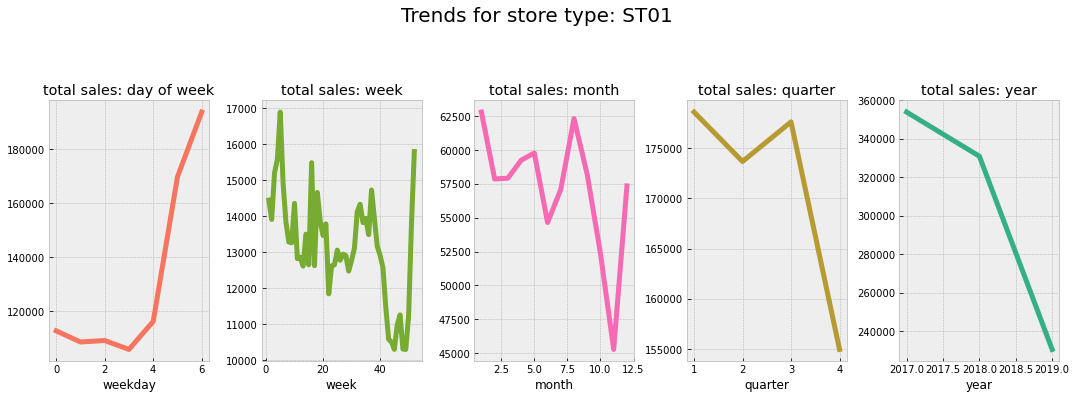

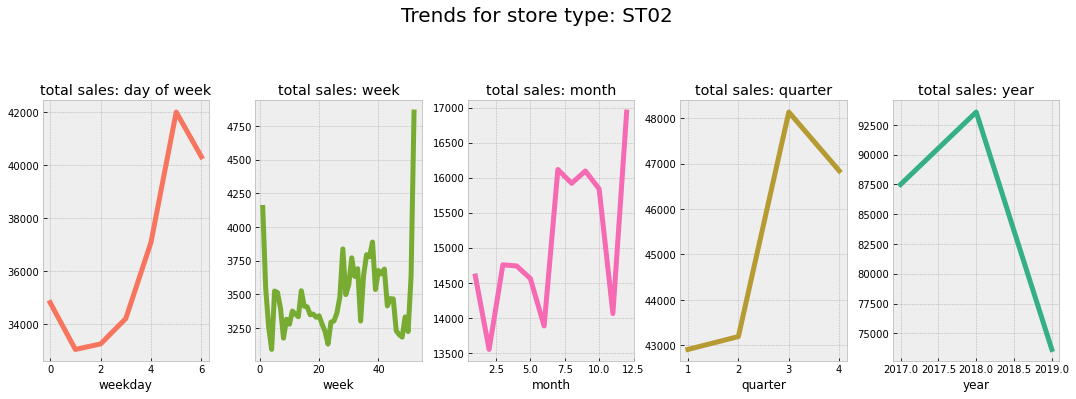

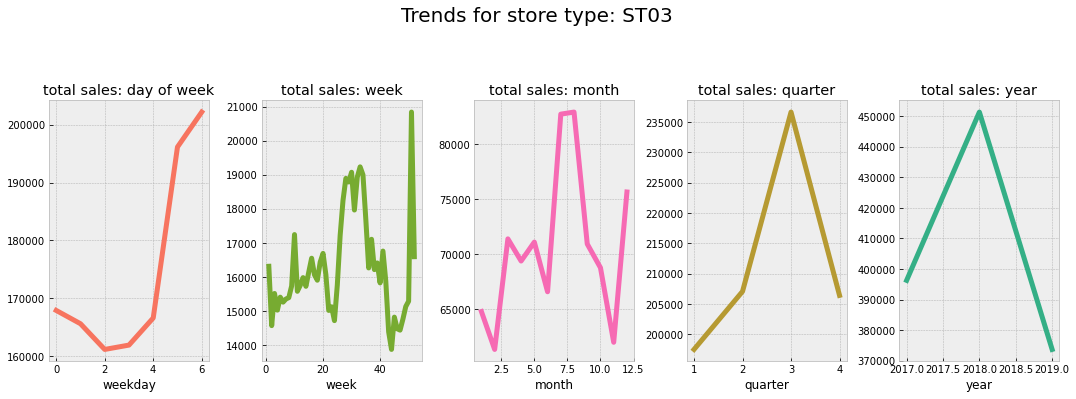

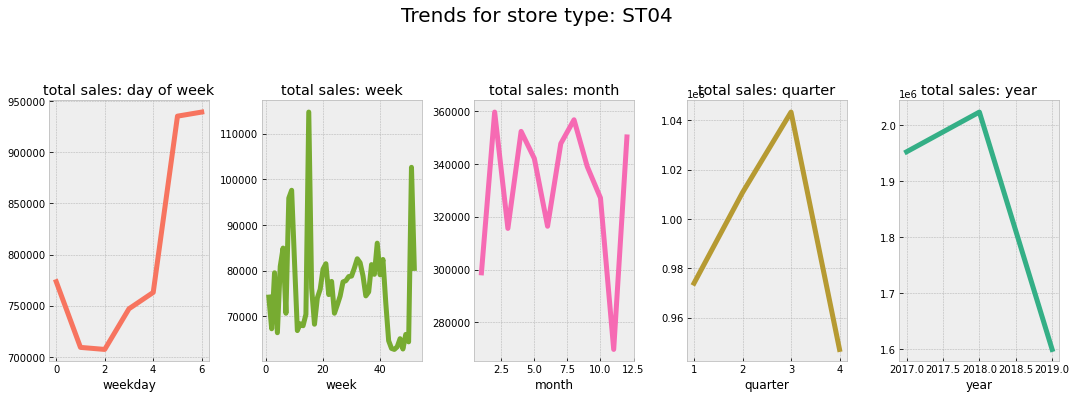

In [9]:
for storetype_id in sorted(data.storetype_id.unique()):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
    data[data.storetype_id == storetype_id].groupby('weekday')['sales'].sum() \
        .plot(kind='line',
              title='total sales: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    data[(data.storetype_id == storetype_id) & (data.year < 2019)].groupby('week')['sales'].sum() \
        .plot(kind='line',
              title='total sales: week',
              lw=5,
              color=color_pal[1],

              ax=ax2)
    data[(data.storetype_id == storetype_id) & (data.year < 2019)].groupby('month')['sales'].sum() \
        .plot(kind='line',
              lw=5,
              title='total sales: month',
              color=color_pal[2],
              ax=ax3)
    
    data[(data.storetype_id == storetype_id) & (data.year < 2019)].groupby('quarter')['sales'].sum() \
        .plot(kind='line',
              lw=5,
              title='total sales: quarter',
              color=color_pal[3],
              ax=ax4)
    
    data[data.storetype_id == storetype_id].groupby('year')['sales'].sum() \
        .plot(kind='line',
              lw=5,
              title='total sales: year',
              color=color_pal[4],
              ax=ax5)
    
    fig.suptitle(f'Trends for store type: {storetype_id}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

## Distribution of sold items by product category and store type - on product level

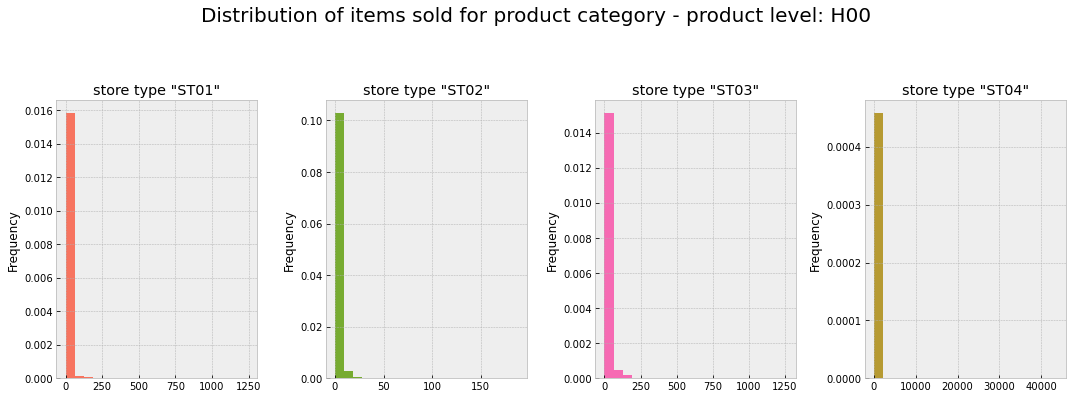

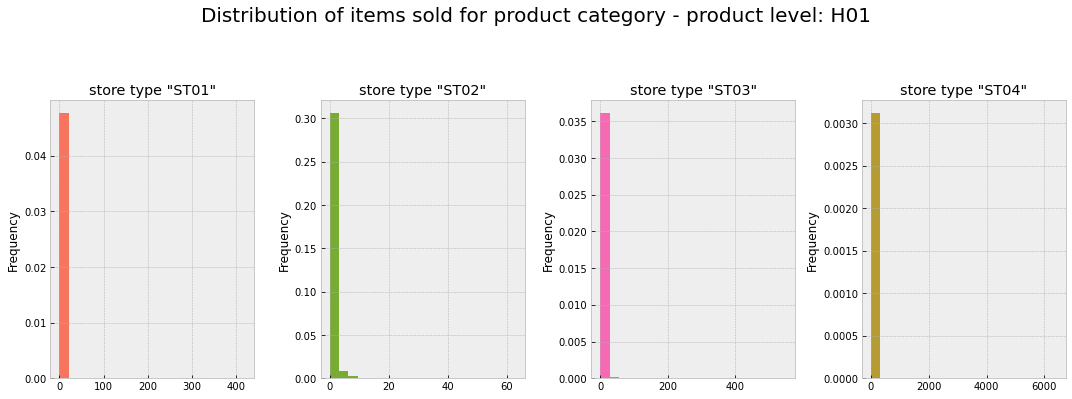

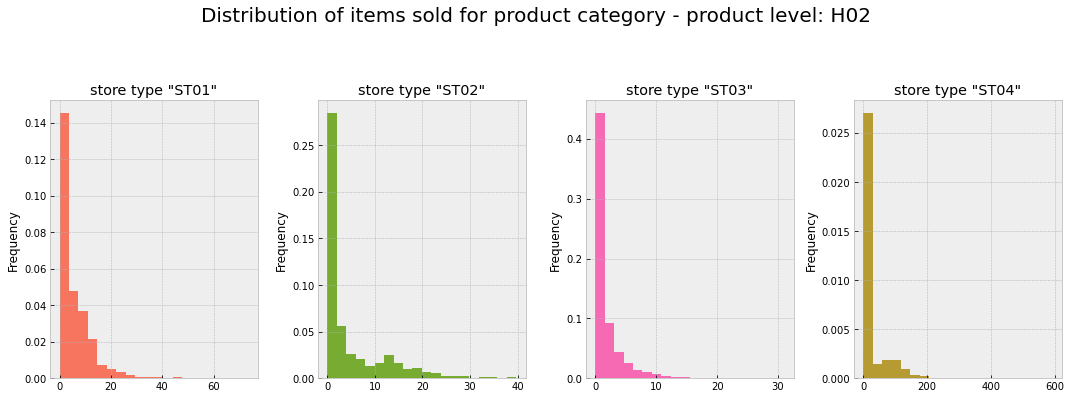

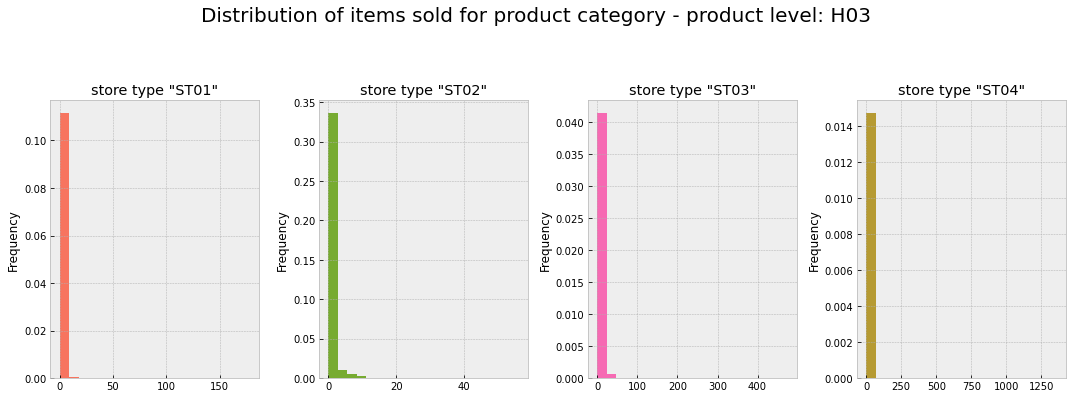

In [10]:
for hierarchy1_id in sorted(data.hierarchy1_id.unique()):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST01')].groupby(['product_id', 'date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST01"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[0],
              ax=ax1)
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST02')].groupby(['product_id', 'date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST02"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[1],
              ax=ax2)
    
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST03')].groupby(['product_id', 'date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST03"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[2],
              ax=ax3)
    
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST04')].groupby(['product_id', 'date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST04"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[3],
              ax=ax4)
    
    fig.suptitle(f'Distribution of items sold for product category - product level: {hierarchy1_id}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

## Distribution of sold items by product category and store type - in total

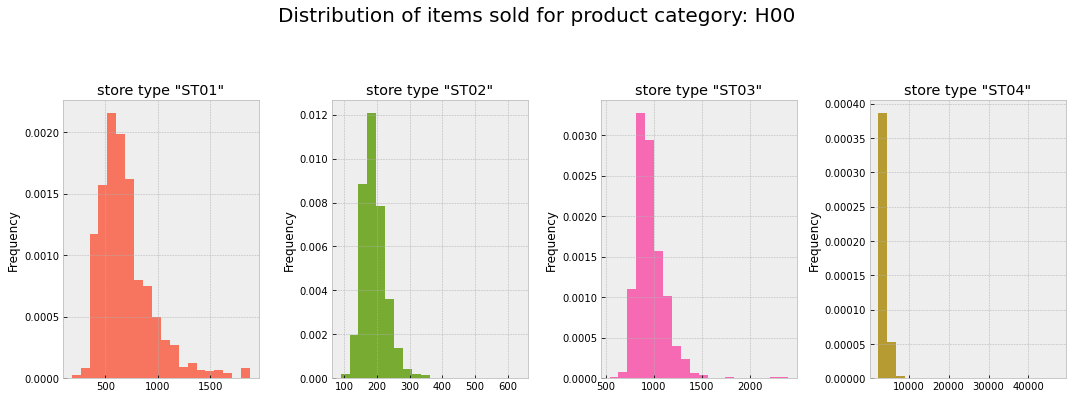

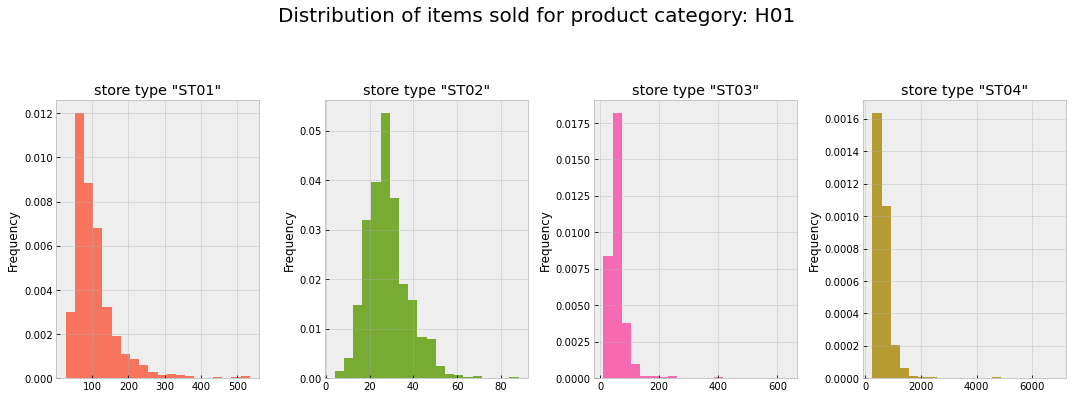

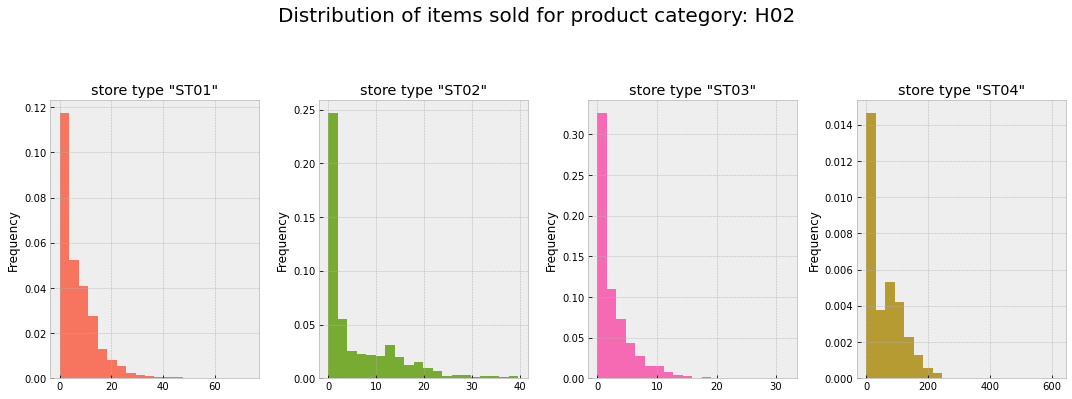

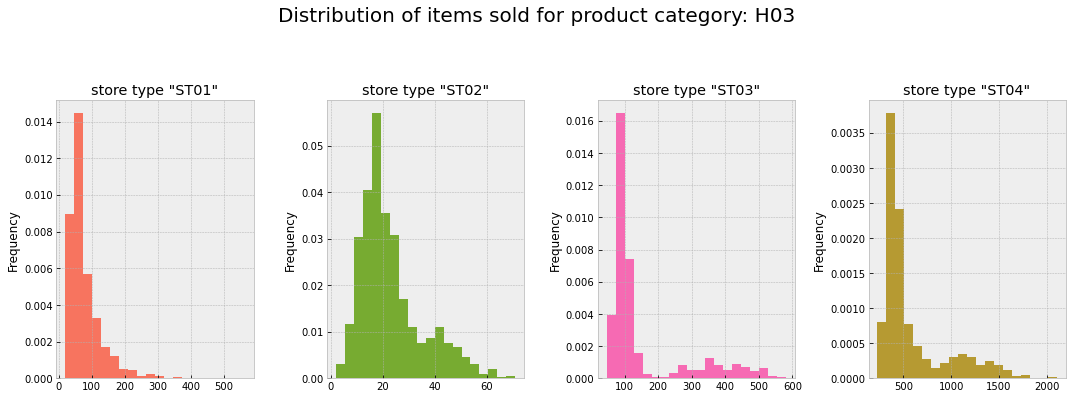

In [11]:
for hierarchy1_id in sorted(data.hierarchy1_id.unique()):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST01')].groupby(['date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST01"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[0],
              ax=ax1)
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST02')].groupby(['date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST02"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[1],
              ax=ax2)
    
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST03')].groupby(['date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST03"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[2],
              ax=ax3)
    
    data[(data.hierarchy1_id == hierarchy1_id) & (data.storetype_id == 'ST04')].groupby(['date'])['sales'].sum() \
        .plot(kind='hist',
              title='store type "ST04"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[3],
              ax=ax4)
    
    fig.suptitle(f'Distribution of items sold for product category: {hierarchy1_id}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

## Percentage of products with zero sales 

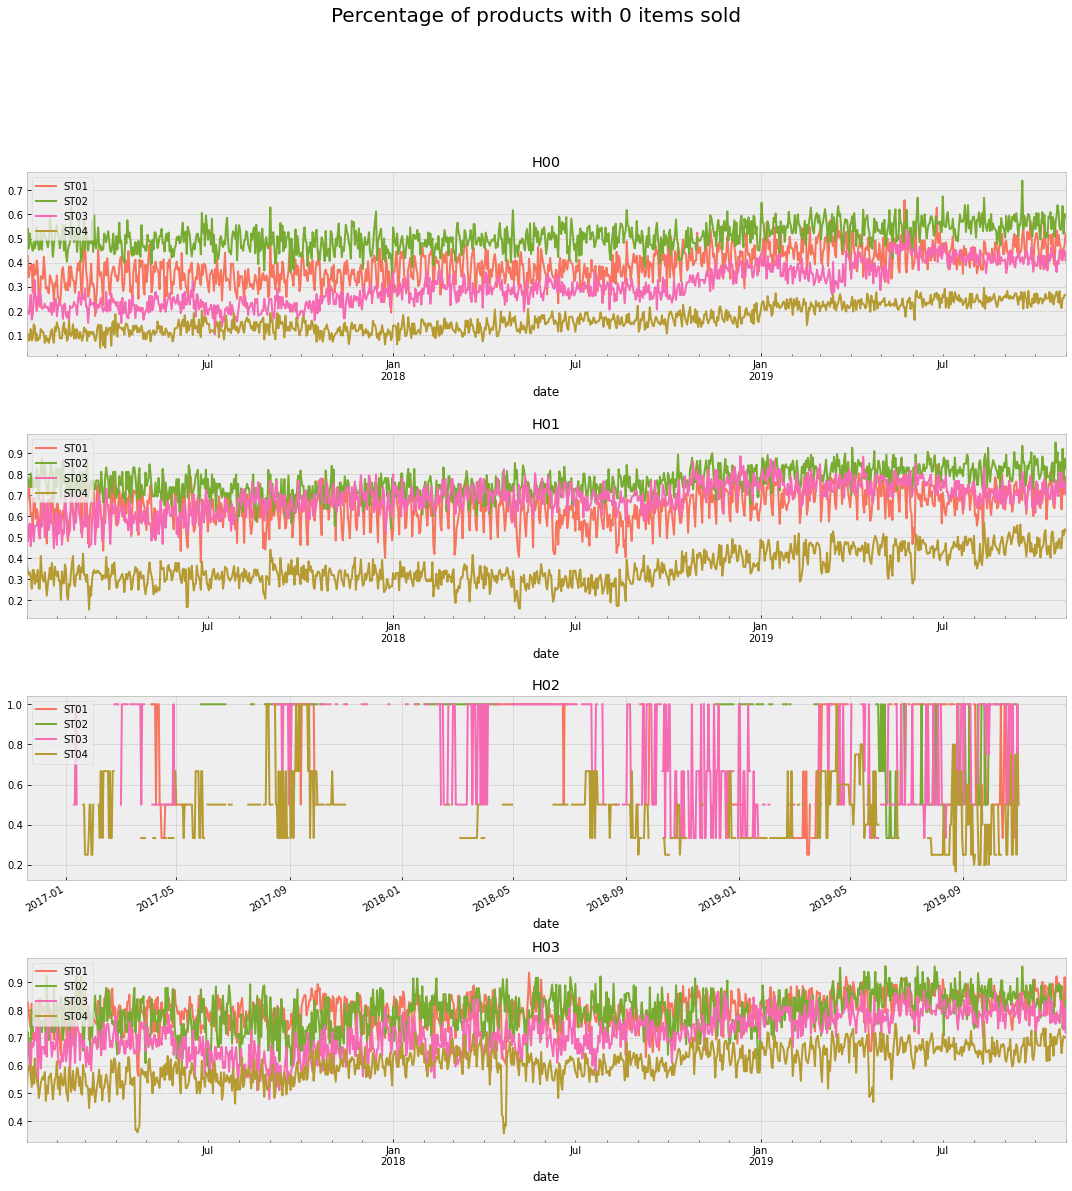

In [12]:
def calculate_share(data, hierarchy1_id, storetype_id):

    all_products = data[(data.hierarchy1_id == hierarchy1_id) & 
                        (data.storetype_id == storetype_id)].groupby(['date'])['product_id'].nunique()

    no_sales_products = data[(data.sales == 0) & 
                             (data.hierarchy1_id == hierarchy1_id) & 
                             (data.storetype_id == storetype_id)].groupby(['date'])['product_id'].nunique()

    return no_sales_products.divide(all_products)

t = data.groupby(['date', 'storetype_id', 'hierarchy1_id', 'product_id'])['sales'].sum().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 15))

for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_share(t, 'H00', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax1, kind='line', color=color_pal[index], title='H00')
    
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_share(t, 'H01', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax2, kind='line', color=color_pal[index], title='H01')
    
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_share(t, 'H02', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax3, kind='line', color=color_pal[index], title='H02')
    
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_share(t, 'H03', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax4, kind='line', color=color_pal[index], title='H03')
    
fig.suptitle('Percentage of products with 0 items sold',
             size=20,
             y=1.1)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Percentage of stock sold - total sales divided by total stock

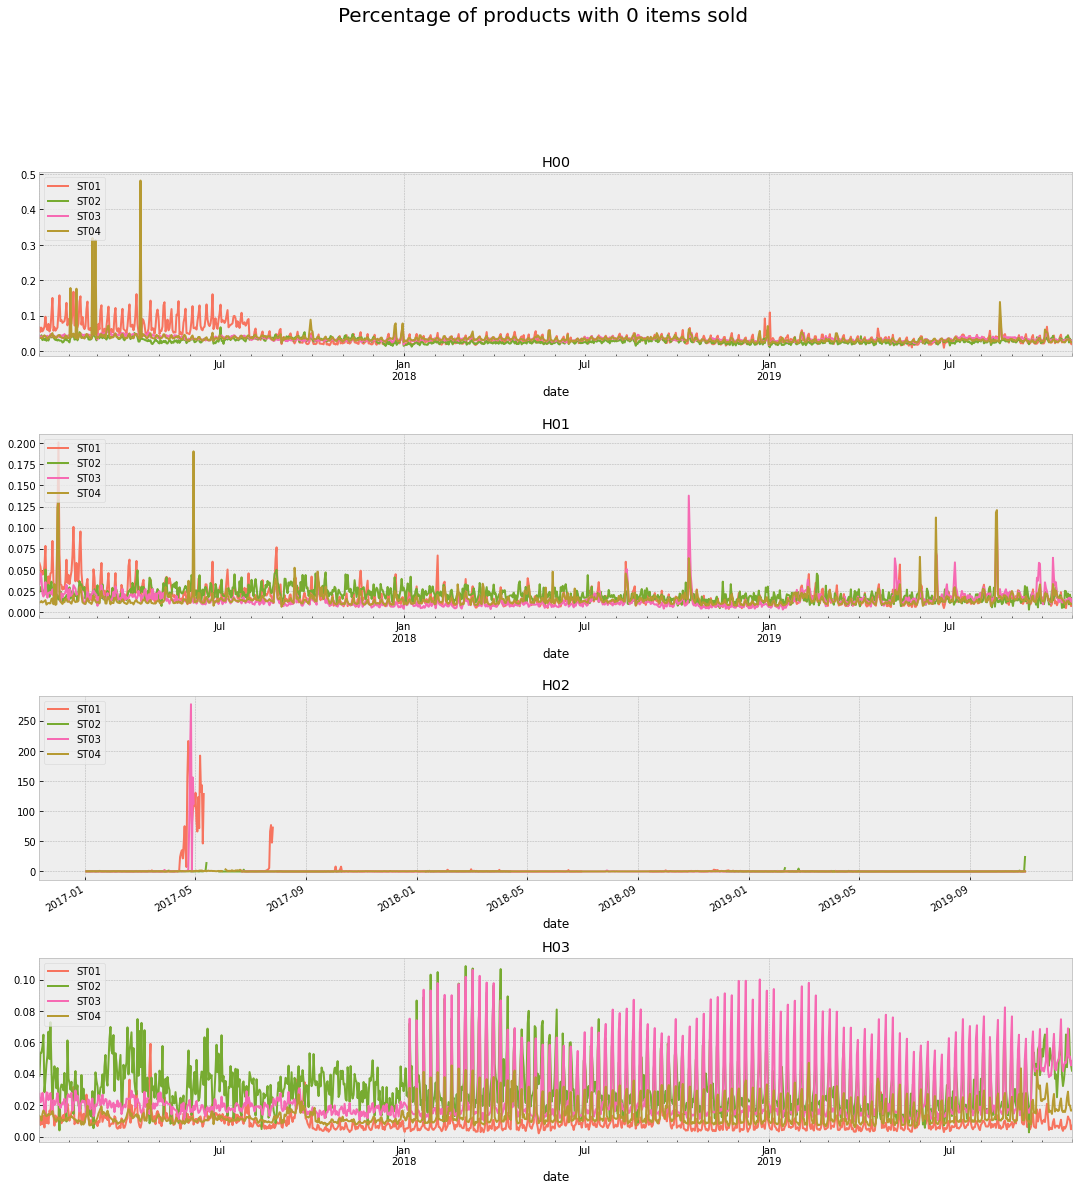

In [13]:
def calculate_perc_of_sales(data, hierarchy1_id, storetype_id):

    total_sales = data[(data.hierarchy1_id == hierarchy1_id) & 
                        (data.storetype_id == storetype_id)].groupby(['date'])['sales'].sum()

    total_stock = data[(data.hierarchy1_id == hierarchy1_id) & 
                       (data.storetype_id == storetype_id)].groupby(['date'])['stock'].sum()

    return total_sales.divide(total_stock)

t = data.groupby(['date', 'storetype_id', 'hierarchy1_id'])[['sales', 'stock']].sum().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 15))

for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_perc_of_sales(t, 'H00', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax1, kind='line', color=color_pal[index], title='H00')
    
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_perc_of_sales(t, 'H01', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax2, kind='line', color=color_pal[index], title='H01')
    
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_perc_of_sales(t, 'H02', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax3, kind='line', color=color_pal[index], title='H02')
    
for index, storetype_id in enumerate(sorted(t.storetype_id.unique())):
    share_of_products = calculate_perc_of_sales(t, 'H03', storetype_id)
    share_of_products.plot(label=storetype_id, ax=ax4, kind='line', color=color_pal[index], title='H03')
    
fig.suptitle('Percentage of products with 0 items sold',
             size=20,
             y=1.1)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax4.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Distribution of active days by product (how many days products are on sale on average)

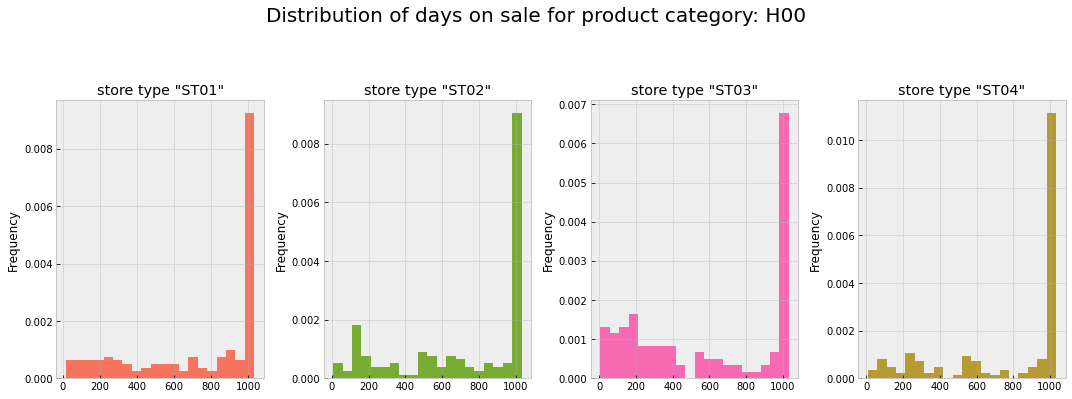

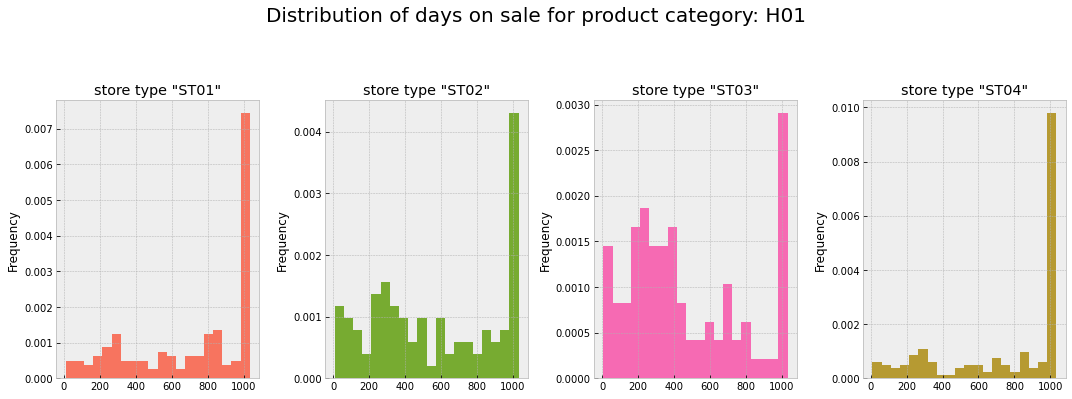

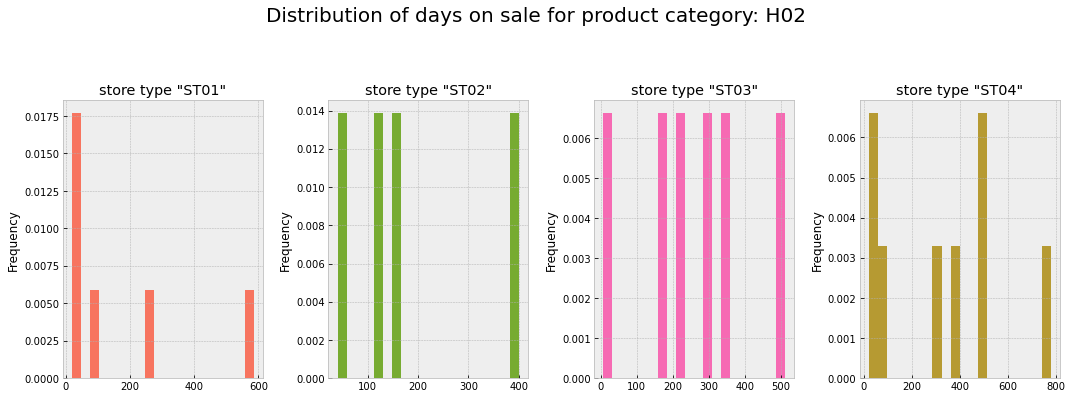

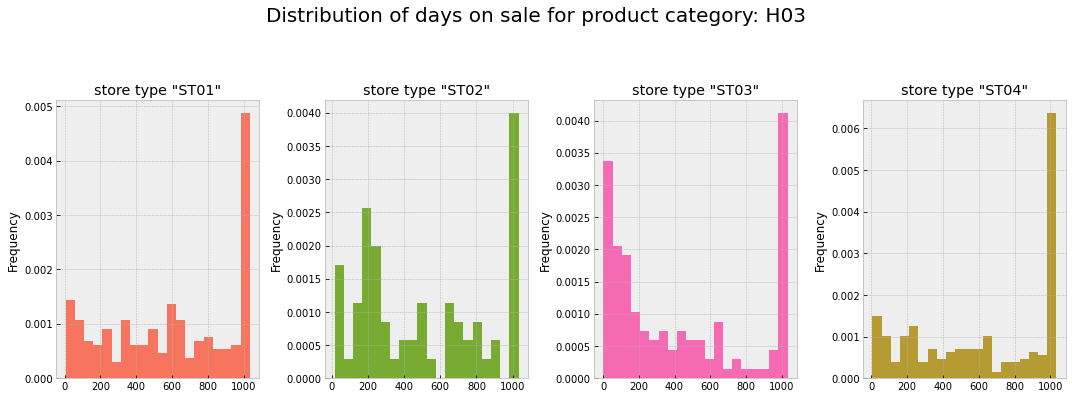

In [14]:
for hierarchy1_id in sorted(data.hierarchy1_id.unique()):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
    data[(data.stock > 0) & 
         (data.hierarchy1_id == hierarchy1_id) & 
         (data.storetype_id == 'ST01')].groupby(['product_id'])['date'].nunique() \
        .plot(kind='hist',
              title='store type "ST01"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[0],
              ax=ax1)
    data[(data.stock > 0) & 
         (data.hierarchy1_id == hierarchy1_id) & 
         (data.storetype_id == 'ST02')].groupby(['product_id'])['date'].nunique() \
        .plot(kind='hist',
              title='store type "ST02"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[1],
              ax=ax2)
    
    data[(data.stock > 0) & 
         (data.hierarchy1_id == hierarchy1_id) & 
         (data.storetype_id == 'ST03')].groupby(['product_id'])['date'].nunique() \
        .plot(kind='hist',
              title='store type "ST03"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[2],
              ax=ax3)
    
    data[(data.stock > 0) & 
         (data.hierarchy1_id == hierarchy1_id) & 
         (data.storetype_id == 'ST04')].groupby(['product_id'])['date'].nunique() \
        .plot(kind='hist',
              title='store type "ST04"',
              bins=20,
              lw=5,
              density=True,
              color=color_pal[3],
              ax=ax4)
    
    fig.suptitle(f'Distribution of days on sale for product category: {hierarchy1_id}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

## Total items sold by promo type

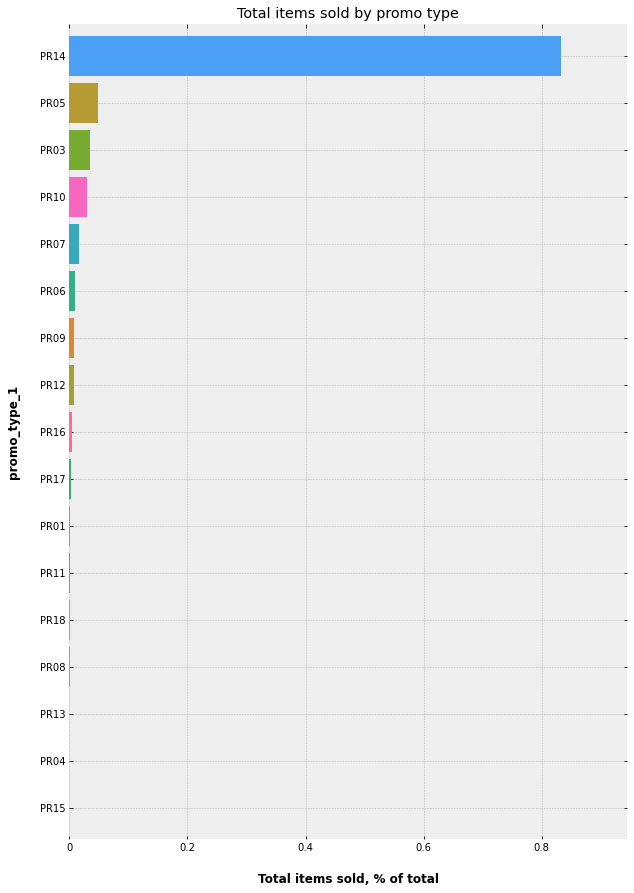

In [15]:
color_map = {}

for promo, color in zip(sorted(data.promo_type_1.unique()), color_pal):
    color_map[promo] = color

total_promo = data.groupby('promo_type_1')['sales'].sum().sort_values()
total_promo = total_promo / total_promo.sum()

ax = total_promo.plot(kind='barh', figsize=(10, 15), 
                      color = [color_map[p] for p in total_promo.index.tolist()], zorder=2, 
                      width=0.85,
                      title='Total items sold by promo type')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Total items sold, % of total", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("promo_type_1", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

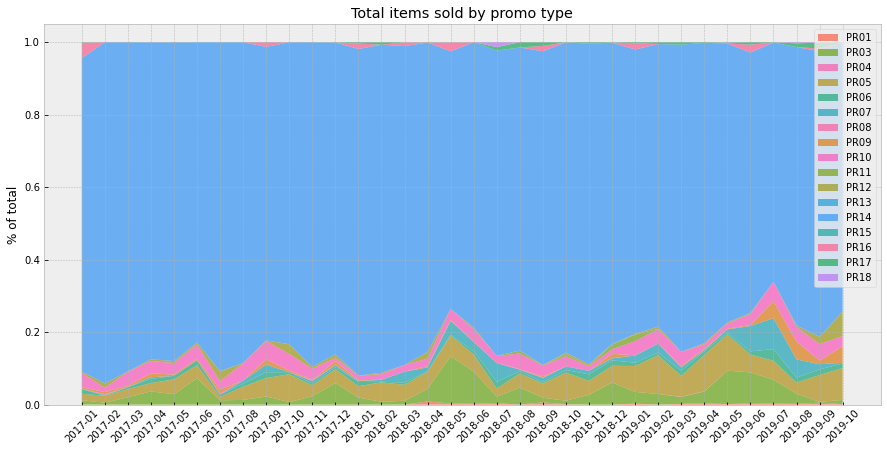

In [16]:
piv = pd.pivot_table(data, 
                     index='year_month',
                     columns='promo_type_1',
                     values='sales',
                     aggfunc='sum'
                    )\
        .reset_index()\
        .fillna(0)

promo_types = []

for promo_type_1 in sorted(data.promo_type_1.unique()):
      promo_types.append(piv[promo_type_1])

piv.iloc[:, 1:] = piv.iloc[:, 1:].divide(piv.iloc[:, 1:].sum(axis=1), axis=0)

plt.figure(figsize=(15, 7))
plt.stackplot(piv.year_month,
              promo_types,
              labels=sorted(data.promo_type_1.unique()),
              alpha=0.8,
              colors=color_pal)
plt.title('Total items sold by promo type')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('% of total')
plt.show()

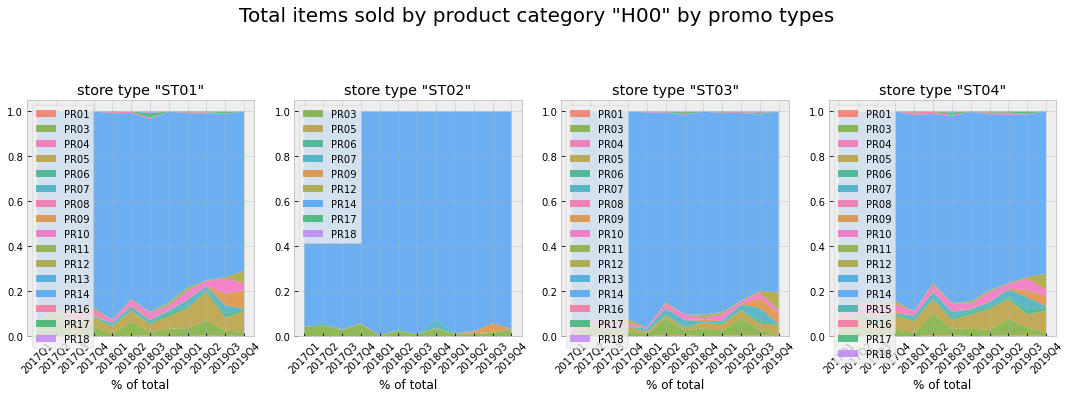

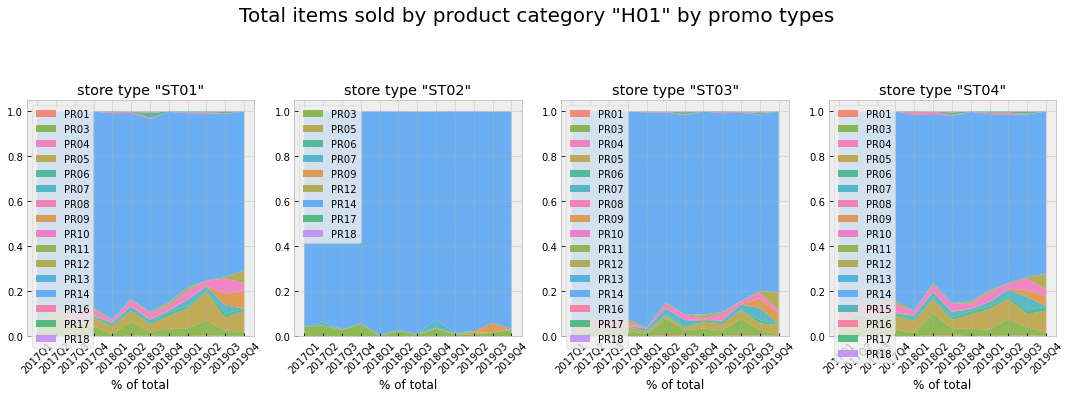

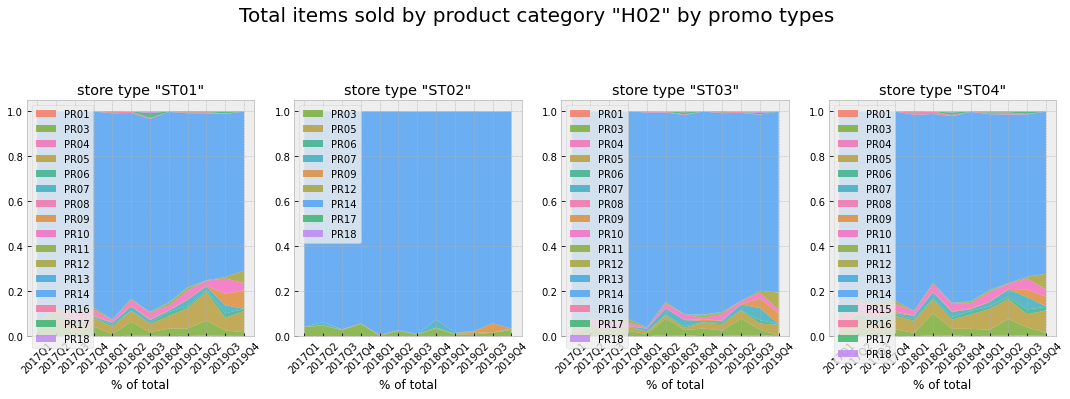

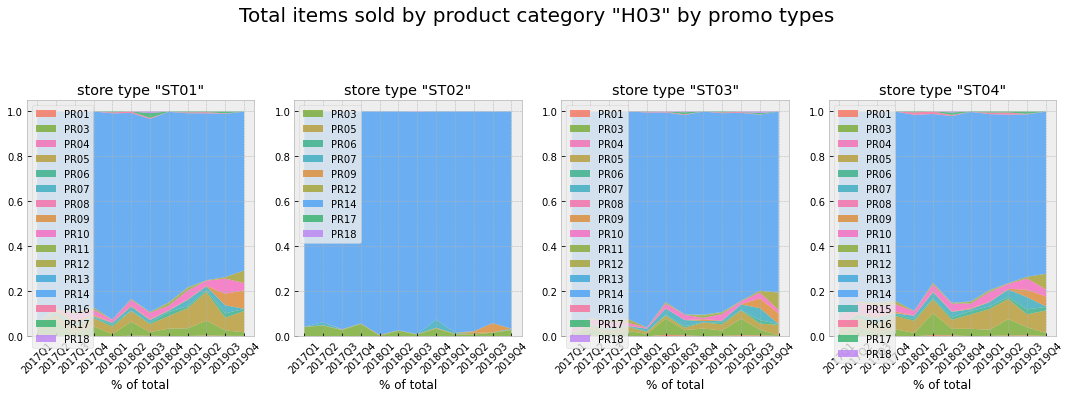

In [17]:
def calculate_promo_types(df):
    piv = pd.pivot_table(df, 
                         index='year_quarter',
                         columns='promo_type_1',
                         values='sales',
                         aggfunc='sum'
                        )\
            .reset_index()\
            .fillna(0)

    promo_types = []
    for promo_type_1 in sorted(df.promo_type_1.unique()):
          promo_types.append(piv[promo_type_1])

    piv.iloc[:, 1:] = piv.iloc[:, 1:].divide(piv.iloc[:, 1:].sum(axis=1), axis=0)
    
    return piv, promo_types, sorted(df.promo_type_1.unique())

    


for hierarchy1_id in sorted(data.hierarchy1_id.unique()):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
    
    df = data[data.hierarchy1_id == hierarchy1_id]
    
    for storetype_id, ax_ in zip(sorted(df.storetype_id.unique()), (ax1, ax2, ax3, ax4)):
        piv, promo_types, promo_names = calculate_promo_types(data[data.storetype_id == storetype_id])
        ax_.stackplot(piv.year_quarter.astype(str).values,
              promo_types,
              labels=promo_names,
              alpha=0.8,
              colors=[color_map[p] for p in promo_names],
              )
        
        ax_.set_title('store type "%s"' % storetype_id)
        ax_.set_xticklabels(piv.year_quarter.astype(str).values, rotation=45)
        ax_.set_xlabel('% of total')

    fig.suptitle('Total items sold by product category "%s" by promo types' % hierarchy1_id,
                 size=20,
                 y=1.1)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    ax4.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

## Total items sold by product category

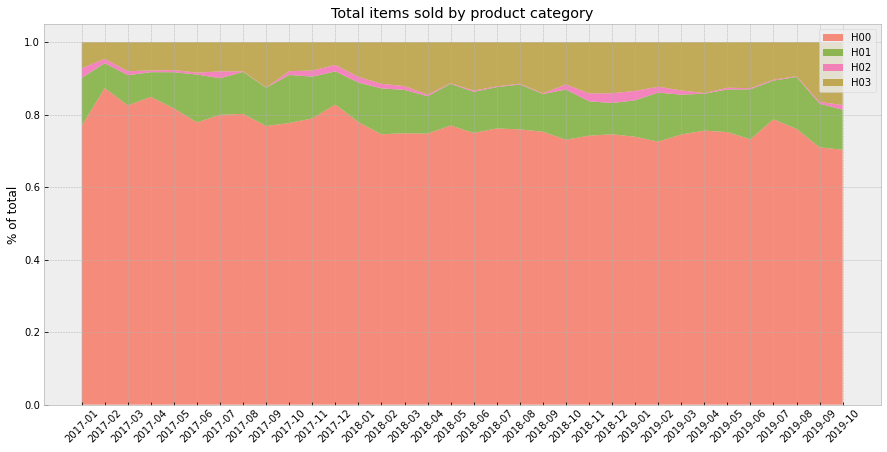

In [18]:
piv = pd.pivot_table(data, 
                     index='year_month',
                     columns='hierarchy1_id',
                     values='sales',
                     aggfunc='sum'
                    )\
        .reset_index()\
        .fillna(0)

piv.iloc[:, 1:] = piv.iloc[:, 1:].divide(piv.iloc[:, 1:].sum(axis=1), axis=0)

plt.figure(figsize=(15, 7))
plt.stackplot(piv.year_month,
              [piv['H00'], piv['H01'],
               piv['H02'], piv['H03']],
              labels=['H00', 'H01', 'H02', 'H03'],
              colors=color_pal,
              alpha=0.8)
plt.title('Total items sold by product category')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('% of total')
plt.show()

## Total items sold by store type

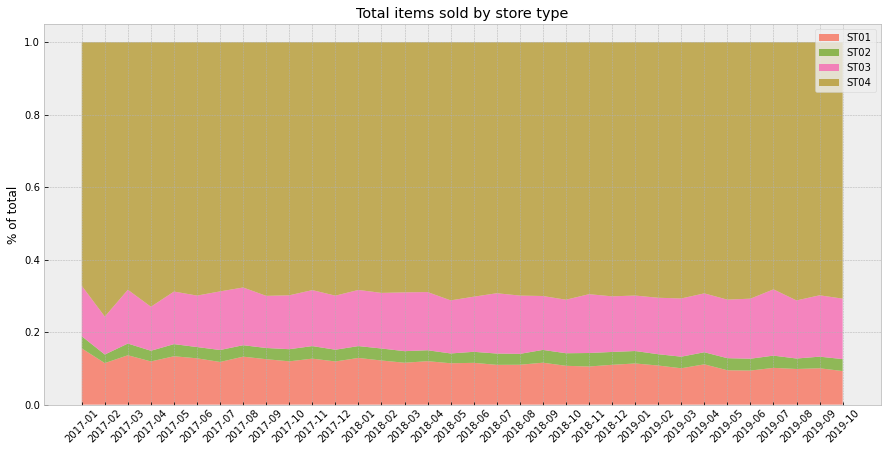

In [19]:
piv = pd.pivot_table(data, 
                     index='year_month',
                     columns='storetype_id',
                     values='sales',
                     aggfunc='sum'
                    )\
        .reset_index()\
        .fillna(0)

piv.iloc[:, 1:] = piv.iloc[:, 1:].divide(piv.iloc[:, 1:].sum(axis=1), axis=0)

plt.figure(figsize=(15, 7))
plt.stackplot(piv.year_month,
              [piv['ST01'], piv['ST02'],
               piv['ST03'], piv['ST04']],
              labels=['ST01', 'ST02', 'ST03', 'ST04'],
              colors=color_pal,
              alpha=0.8)
plt.title('Total items sold by store type')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('% of total')
plt.show()

## Total items sold by city

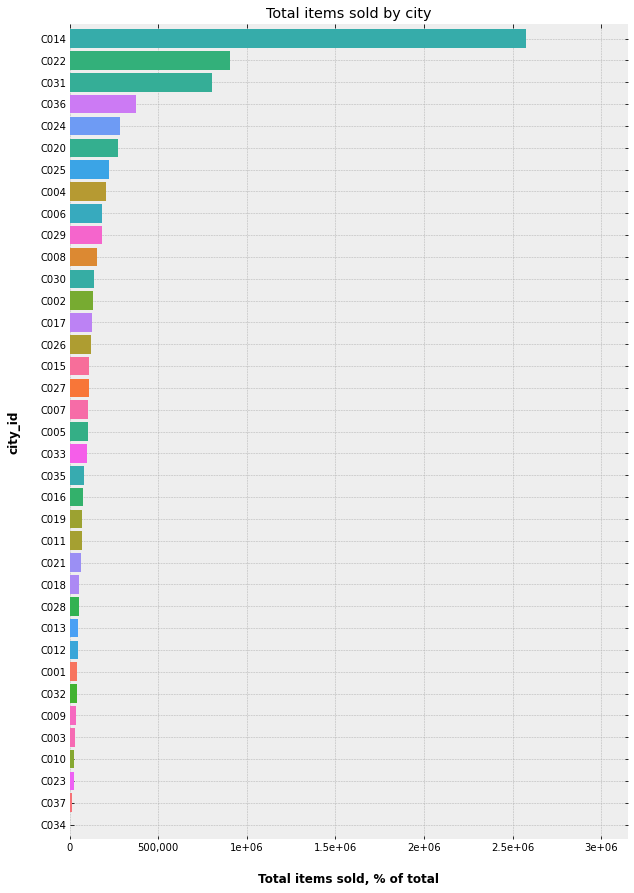

In [20]:
color_map = {}

for city, color in zip(sorted(data.city_id.unique()), color_pal):
    color_map[city] = color


total_city = data.groupby('city_id')['sales'].sum().sort_values()
total_city = total_city / total_promo.sum()

ax = total_city.plot(kind='barh', figsize=(10, 15), 
                      color = [color_map[p] for p in total_city.index.tolist()], 
                      zorder=2, 
                      width=0.85,
                      title='Total items sold by city')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Total items sold, % of total", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("city_id", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

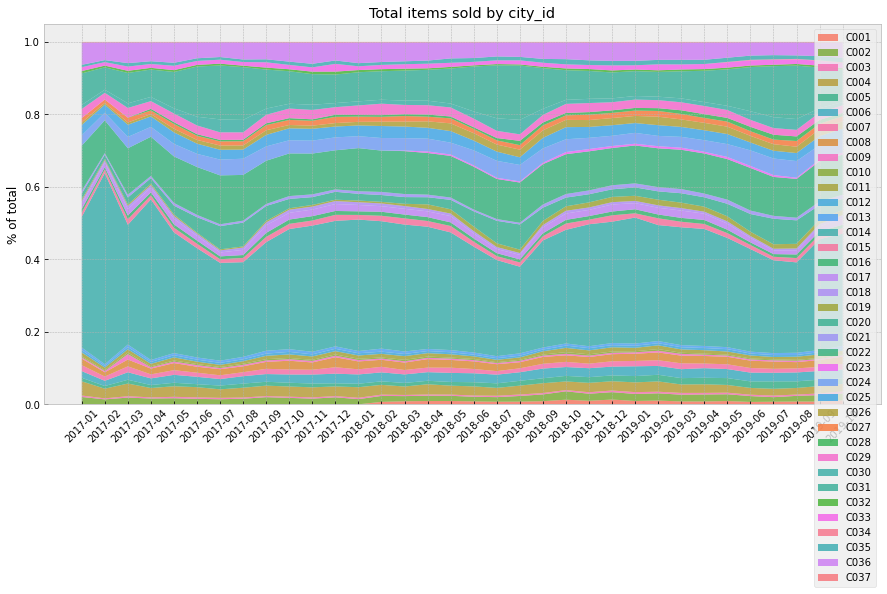

In [21]:
piv = pd.pivot_table(data, 
                     index='year_month',
                     columns='city_id',
                     values='sales',
                     aggfunc='sum'
                    )\
        .reset_index()\
        .fillna(0)

piv.iloc[:, 1:] = piv.iloc[:, 1:].divide(piv.iloc[:, 1:].sum(axis=1), axis=0)

plt.figure(figsize=(15, 7))
plt.stackplot(piv.year_month,
              [piv[p] for p in piv.columns[1:]],
              labels=piv.columns[1:],
              colors=[color_map[p] for p in piv.columns[1:]],
              alpha=0.8)
plt.title('Total items sold by city_id')
plt.legend()
plt.ylabel('% of total')
plt.xticks(rotation=45)
plt.show()

# Conclusions

- Most of sales relate to product category H00 and ST04
- More that 70% of records have 0 sales per product
- Promotion type PR14 counts for > 80% of sold items
- Top-3 cities generated > 50% of sales
- There is a high daily and monthly seasonality
- Most of the product were on sale for all dates in period
- Out-of-stock rate is 2.3% on average. It is higher for H02 and H03 product categories

Ideas for ML model
- a separate model to predict if product has sales or not (binary classification)
- seasonal model to predict total sales per product category, store type and date
- model by daily product sales
- stacking model that combines all predictions
- we can neglect the out-of-stock problem for ML prototype (the rate seems to be relatively low)